<a href="https://colab.research.google.com/github/anirudh4git/Zomato-Review-Sentniment-Analysis/blob/main/ZOMATO__RESTAURANT_CLUSTERING_%26_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_rest = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone - ML- Zomato Sentiment Analysis/Zomato Restaurant names and Metadata.csv')

In [4]:
df_reviews = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone - ML- Zomato Sentiment Analysis/Zomato Restaurant reviews.csv')

In [5]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [7]:
df_rest.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [9]:
type(df_rest['Cuisines'][0])

str

In [10]:
df_rest.shape

(105, 6)

In [7]:
df_rest['Cuisines'][0]

'Chinese, Continental, Kebab, European, South Indian, North Indian'

In [10]:
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [13]:
len(df_reviews['Restaurant'].unique())

100

In [14]:
len(df_rest['Name'].unique())

105

In [5]:
df_rest.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


## We are going to drop the Links Column because no info is provided relative to the project.

In [7]:
df_rest.drop('Links',axis=1,inplace = True)

In [8]:
df_rest.head()

,Name,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


## We are also going to drop the Collections column as more than 50% of data is null.

In [ ]:
df_rest[~df_rest['Collections'].isna()]

In [13]:
df_rest.drop('Collections',axis=1,inplace=True)

In [14]:
df_rest.head()

,Name,Cost,Cuisines,Timings
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
df_rest['Timings'].unique()

## We are going to drop the timing Cols also as All the restaurants seem to be open for the similar timings.

In [19]:
df_rest.drop('Timings',axis=1,inplace=True)

In [28]:
df_rest.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,"Biryani, North Indian, Chinese"
2,Flechazo,"1,300","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,"1,200","Asian, Continental, North Indian, Chinese, Med..."


In [21]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Cost      105 non-null    object
 2   Cuisines  105 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


## There are no null values present now, we can start with some data preprocessing.

## Changing the dtype for Cost

In [29]:
# removing ','
df_rest['Cost'] = df_rest['Cost'].str.replace(',','')

# changing to int
df_rest['Cost'] = df_rest['Cost'].astype('int')

In [31]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      105 non-null    object
 1   Cost      105 non-null    int64 
 2   Cuisines  105 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


## Trying to convert the cuisine column into a list to onehot encode all the cusines in df

In [34]:
df_rest['Cuisines'] = df_rest['Cuisines'].str.replace(' ','')

In [37]:
df_rest['Cuisines'] = df_rest['Cuisines'].str.split(',')

In [39]:
df_rest['Cuisines']

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

## Importing MultilabelBinarizer

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

## Making one hot encoded labels for each type of cuisines and dropping the cuisine column

In [47]:
df_rest = df_rest.join(pd.DataFrame.sparse.from_spmatrix( mlb.fit_transform(df_rest.pop('Cuisines')), index=df_rest.index, columns=mlb.classes_ ))

In [49]:
df_rest

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
101,Sweet Basket,200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,Angaara Counts 3,500,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103,Wich Please,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
df_rest.drop(['Name','Cost'],axis = 1).sum().sort_values(ascending=False)

NorthIndian      61
Chinese          43
Continental      21
Biryani          16
Asian            15
FastFood         15
Italian          14
Desserts         13
SouthIndian       9
Bakery            7
Kebab             6
Andhra            6
Cafe              6
American          6
Mughlai           6
Burger            5
Salad             5
Mediterranean     5
Beverages         5
European          4
Seafood           4
Hyderabadi        4
Momos             4
Sushi             4
Thai              3
IceCream          2
Japanese          2
StreetFood        2
FingerFood        2
ModernIndian      2
Arabian           2
BBQ               2
Spanish           1
Mithai            1
Pizza             1
NorthEastern      1
Mexican           1
Goan              1
HealthyFood       1
Indonesian        1
Juices            1
Lebanese          1
Malaysian         1
Wraps             1
dtype: int64

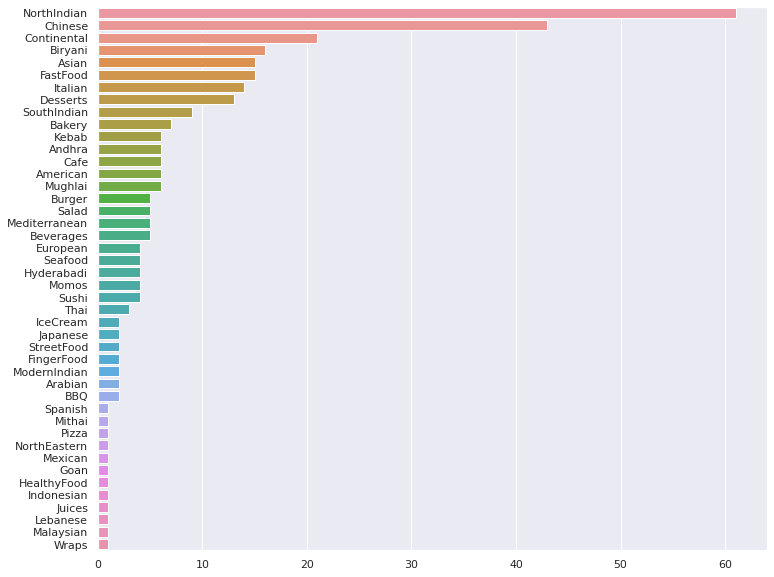

In [59]:
plt.figure(figsize = (12,10))
sns.barplot(y = df_rest.drop(['Name','Cost'],axis = 1).sum().sort_values(ascending=False).index,x = df_rest.drop(['Name','Cost'],axis = 1).sum().sort_values(ascending=False))

## Merging the two dataframes

In [90]:
df_reviews['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5'], dtype=object)

In [91]:
df_reviews[~df_reviews['Rating'].isin(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'])]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [85]:
df_reviews.dropna(subset = ['Rating'],inplace=True)

In [89]:
df_reviews['Rating'] = df_reviews['Rating'].replace('Like','4')

In [92]:
df_reviews['Rating'] = df_reviews['Rating'].astype('float')

In [100]:
df_ratings = df_reviews.groupby('Restaurant')['Rating'].mean().reset_index()

In [101]:
df_ratings

,Restaurant,Rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48
2,"3B's - Buddies, Bar & Barbecue",4.76
3,AB's - Absolute Barbecues,4.88
4,Absolute Sizzlers,3.62
...,...,...
95,Urban Asia - Kitchen & Bar,3.65
96,Yum Yum Tree - The Arabian Food Court,3.56
97,Zega - Sheraton Hyderabad Hotel,4.45
98,Zing's Northeast Kitchen,3.65


In [68]:
'eat.fit' in df_rest['Name'].unique()

True

In [102]:
df = df_rest.merge(df_ratings, left_on='Name',right_on='Restaurant')

In [105]:
df.head()

,Name,Cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,FastFood,FingerFood,Goan,HealthyFood,Hyderabadi,IceCream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,ModernIndian,Momos,Mughlai,NorthEastern,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,1300,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


In [106]:
df.drop(['Name','Cost','Restaurant','Rating'],axis = 1).sum().sort_values(ascending=False)

NorthIndian      60
Chinese          41
Continental      21
Biryani          15
Italian          14
Asian            14
Desserts         13
FastFood         13
SouthIndian       9
Kebab             6
Andhra            6
Bakery            6
Cafe              6
American          6
Mughlai           6
Burger            5
Mediterranean     5
Beverages         5
Salad             4
European          4
Seafood           4
Hyderabadi        4
Momos             4
Sushi             4
Thai              2
IceCream          2
Japanese          2
StreetFood        2
FingerFood        2
ModernIndian      2
Arabian           2
BBQ               2
Spanish           1
Wraps             1
Pizza             1
NorthEastern      1
Mexican           1
Goan              1
HealthyFood       1
Indonesian        1
Juices            1
Lebanese          1
Malaysian         0
Mithai            0
dtype: int64